In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('employees.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
First Name           933 non-null object
Gender               855 non-null object
Start Date           1000 non-null object
Last Login Time      1000 non-null object
Salary               1000 non-null int64
Bonus %              1000 non-null float64
Senior Management    933 non-null object
Team                 957 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
# Checking the column wise null values in a heatmap

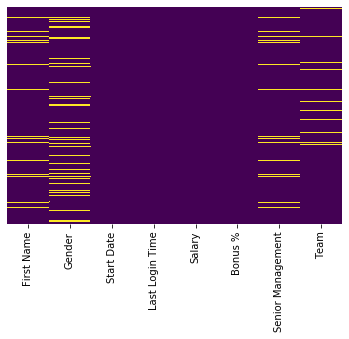

In [11]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [12]:
df.head(2)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN


In [14]:
df.dropna(how = 'any', inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 999
Data columns (total 7 columns):
First Name           764 non-null object
Gender               764 non-null object
Start Date           764 non-null datetime64[ns]
Salary               764 non-null int64
Bonus %              764 non-null float64
Senior Management    764 non-null bool
Team                 764 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 42.5+ KB


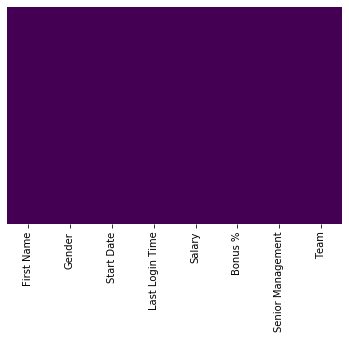

In [16]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')

In [17]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


In [18]:
# Dropping irrelevant columns

In [21]:
df.drop(columns = 'Last Login Time', inplace = True)

In [22]:
# Changing the data types

In [24]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [26]:
df['Senior Management'] = df['Senior Management'].astype(bool)

In [33]:
df.select_dtypes('object')

,First Name,Gender,Team
0,Douglas,Male,Marketing
2,Maria,Female,Finance
3,Jerry,Male,Finance
4,Larry,Male,Client Services
5,Dennis,Male,Legal
...,...,...,...
994,George,Male,Marketing
996,Phillip,Male,Finance
997,Russell,Male,Product
998,Larry,Male,Business Development


In [35]:
teams = df.groupby('Team')

# Total Salary by Each Team

Text(0.5, 1.0, 'Total Salary by Each Team')

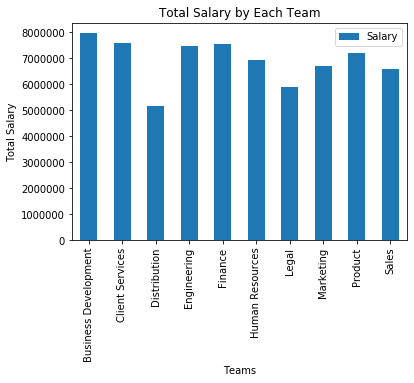

In [47]:
teams.agg({'Salary': 'sum'}).plot(kind = 'bar')
plt.legend()
plt.xlabel('Teams')
plt.ylabel('Total Salary')
plt.title('Total Salary by Each Team')

# Number of Employees by each Gender 

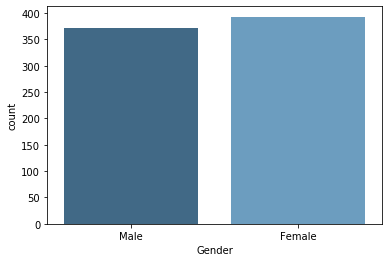

In [112]:
sns.countplot(x = 'Gender', data = df, palette = 'Blues_d')

In [52]:
df['Gender'].value_counts()

Female    393
Male      371
Name: Gender, dtype: int64

# Total Salary by Each Gender

Text(0.5, 1.0, 'Total Salary by Each Gender')

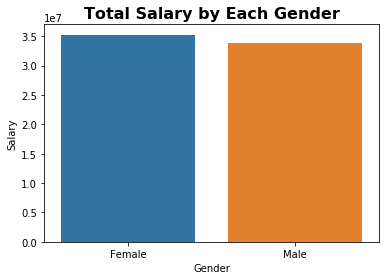

In [113]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'Gender', y = 'Salary', data = df, estimator = sum, ci = None, order = ['Female','Male'] )
plt.title('Total Salary by Each Gender', fontdict = {'fontweight' : 'bold', 'fontsize' : '16'})


In [56]:
df1 = df.groupby('Gender')

In [57]:
df1.agg({'Salary': 'sum'})

,Salary
Gender,
Female,35266576
Male,33824386


# Average Salary by Each Gender

Text(0.5, 1.0, 'Average Salary by Each Gender')

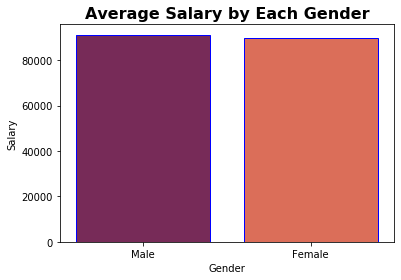

In [78]:
sns.barplot(x = 'Gender', y = 'Salary', data = df,ci = None, palette = 'rocket',edgecolor = 'blue')
plt.title('Average Salary by Each Gender', fontdict = {'fontweight' : 'bold', 'fontsize' : '16'})

In [74]:
df1.agg({'Salary' : 'mean'})

,Salary
Gender,
Female,89736.834606
Male,91170.851752


# Percentage of Employees in Senior Management

In [86]:
labels = df['Senior Management'].value_counts().index
colors = ['blue','green']
explode = [0,0.1]
values = df['Senior Management'].value_counts().values

Text(0.5, 1.0, 'Senior Mangement %')

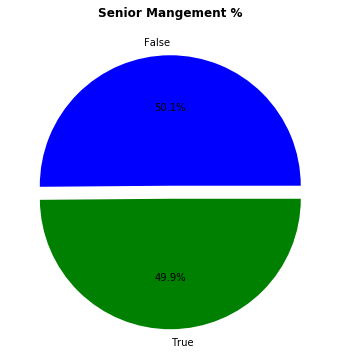

In [91]:
plt.figure(figsize = (6,6))
plt.pie(values, explode = explode, labels = labels, colors = colors,autopct = '%1.1f%%')
plt.title('Senior Mangement %', fontdict = {'fontweight' : 'bold', 'fontsize' : 12})

In [81]:
df['Senior Management'].value_counts()

False    383
True     381
Name: Senior Management, dtype: int64

# Salary by Team - Gender Wise

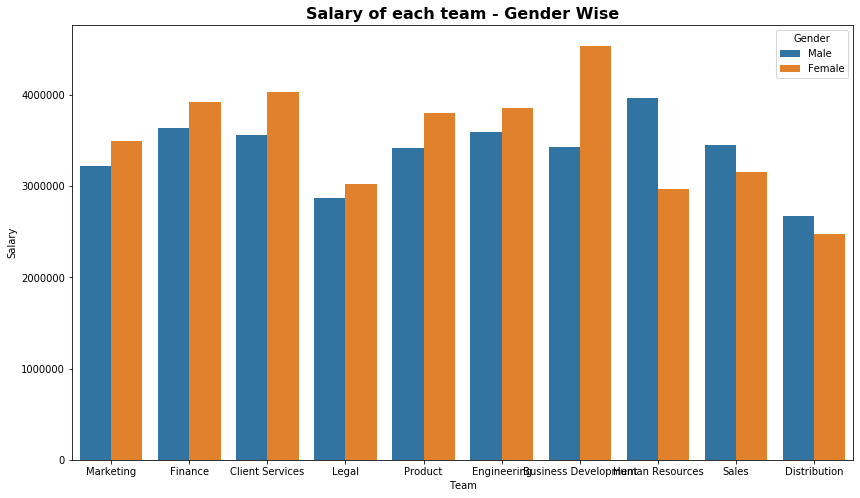

In [102]:
plt.figure(figsize = (14,8))
plt.title('Salary of each team - Gender Wise', fontdict = {'fontweight' : 'bold','fontsize' : 16})
sns.barplot(x = 'Team', y = 'Salary', data = df, estimator = sum, hue = 'Gender', ci = None)

In [104]:
df2 = df.groupby(['Team','Gender'])

In [108]:
df2.sum()

Salary  Bonus %  Senior Management
Team                 Gender                                     
Business Development Female  4539606  511.039               27.0
                     Male    3426189  422.816               22.0
Client Services      Female  4029908  482.026               20.0
                     Male    3563708  397.039               17.0
Distribution         Female  2474177  301.285               12.0
                     Male    2676769  252.007               16.0
Engineering          Female  3857450  416.996               22.0
                     Male    3597733  385.130               21.0
Finance              Female  3926300  382.617               21.0
                     Male    3635226  405.146               18.0
Human Resources      Female  2964584  349.025               19.0
                     Male    3962449  429.437               23.0
Legal                Female  3027725  312.118               19.0
                     Male    2872724  402.228               12.0
Marketing            Female  3496196  375.432               18.0
                     Male    3220346  397.582               20.0
Product              Female  3798683  428.612               21.0
                     Male    3417002  377.713               13.0
Sales                Female  3151947  355.375               17.0
                     Male    3452240  369.480               23.0

# Count of Employees by Team

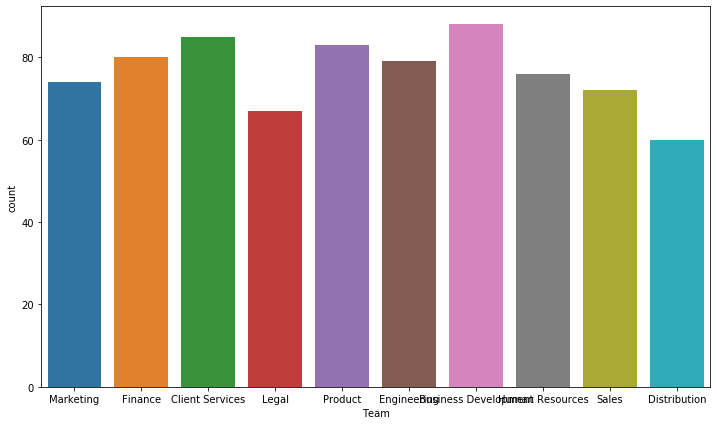

In [111]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'Team', data = df)

In [116]:
df['Team'].value_counts()

Business Development    88
Client Services         85
Product                 83
Finance                 80
Engineering             79
Human Resources         76
Marketing               74
Sales                   72
Legal                   67
Distribution            60
Name: Team, dtype: int64